In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import scipy as sp
import scipy.stats as stats
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
participants = '../resource/classification-participants.csv'
all_participants = '../resource/all-participants.csv'
classification_participants_data = pd.read_csv(participants, delimiter=',', index_col=None)
all_participants_data = pd.read_csv(all_participants, delimiter=',', index_col=None)
all_participants_data.describe()
df = classification_participants_data
df.describe()
df.head()



,id,experience
count,105.000000,105.000000
mean,1375.476190,4.019048
std,406.648003,4.274209
min,871.000000,0.000000
25%,1028.000000,1.000000
50%,1303.000000,3.000000
75%,1661.000000,5.000000
max,2311.000000,25.000000


,id,experience
count,84.000000,84.000000
mean,1465.654762,4.238095
std,406.227294,4.300796
min,871.000000,0.000000
25%,1123.750000,2.000000
50%,1403.000000,3.000000
75%,1724.250000,5.000000
max,2311.000000,25.000000


,id,created,missing,email,experience,highest_degree,job_title,comment,self_assessment,style_format
0,871,2019-07-30 12:23:53.241,One comment that may. Have all categories or a...,florianxbernard@gmail.com,0,self taught,PhD candidate,NaN,Moderate,Numpydoc
1,872,2019-07-30 12:48:47.457,NaN,jeremy.kubrak@uzh.ch,2,Bachelor's degree,Software Engineer,NaN,Moderate,I don't follow a particular style
2,873,2019-07-30 12:53:52.298,NaN,NaN,3,Bachelor's degree,Consultor,NaN,Moderate,Google
3,1029,2019-07-30 15:34:10.342,NaN,NaN,0,College,Student,NaN,Moderate,I don't follow a particular style
4,878,2019-07-30 13:11:00.238,NaN,NaN,4,College,student,NaN,Moderate,I don't follow a particular style


<h3>Analysis of Participant variety</h3>



<h4>Analysis of used Docstring Formats in Practice</h4>



<h4>Distribution of Python skills self-assessment</h4>


I don't follow a particular style                        64
ReStructuredText                                         12
I don't write Python comments                            11
Google                                                   10
Numpydoc                                                  5
Epytext                                                   2
Sorry, genuinely don't know. PyCharm's default style.     1
Name: style_format, dtype: int64

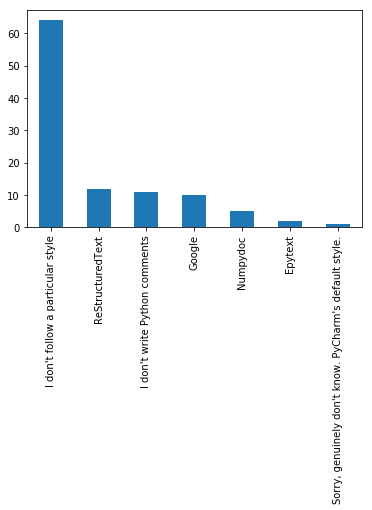

In [3]:
pd.value_counts(all_participants_data["style_format"])
pd.value_counts(all_participants_data["style_format"]).plot.bar()


id                                                   \
                count         mean         std     min     25%     50%   
self_assessment                                                          
High             21.0  1304.714286  264.605205   976.0  1123.0  1303.0   
Low              12.0  1771.833333  390.962178   954.0  1653.5  1726.5   
Moderate         49.0  1444.571429  417.094214   871.0  1069.0  1376.0   
None              2.0  1835.000000  548.714862  1447.0  1641.0  1835.0   

                                 experience                                 \
                     75%     max      count      mean       std  min   25%   
self_assessment                                                              
High             1441.00  2073.0       21.0  7.142857  6.657971  0.0  4.00   
Low              2075.25  2271.0       12.0  2.250000  2.094365  0.0  1.00   
Moderate         1722.00  2311.0       49.0  3.428571  2.500000  0.0  2.00   
None             2029.00  2223.0        2.0  5.500000  6.363961  1.0  3.25   

                                  
                 50%   75%   max  
self_assessment                   
High             5.0  7.00  25.0  
Low              2.0  2.25   8.0  
Moderate         3.0  4.00  11.0  
None             5.5  7.75  10.0

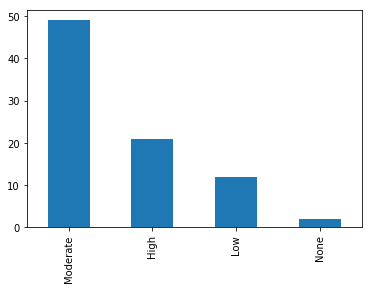

In [5]:
pd.value_counts(df["self_assessment"]).plot.bar()
assessment_groups = df.groupby("self_assessment")
assessment_groups.describe()


<h4>Distribution of experience</h4>


count    84.000000
mean      4.238095
std       4.300796
min       0.000000
25%       2.000000
50%       3.000000
75%       5.000000
max      25.000000
Name: experience, dtype: float64

,experience
count,84.000000
mean,4.238095
std,4.300796
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,25.000000


{'bodies': [<matplotlib.collections.PolyCollection at 0x1f1963d1b70>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f196393b70>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f1963d1f98>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f1963d1fd0>}

Text(0, 0.5, 'Distribution of Professional Experience')

([<matplotlib.axis.YTick at 0x1f1963c2dd8>],
 <a list of 0 Text yticklabel objects>)

Text(0.5, 0, 'Years')

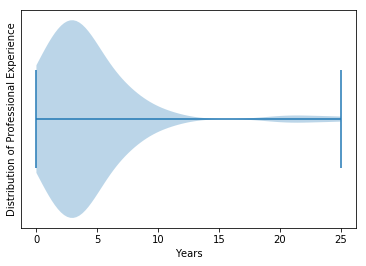

In [6]:

df["experience"].describe()
#plt.plot(range(0, len(df["experience"])), df["experience"].sort_values(ascending=False))
#plt.xlabel("Number of Different Plugins")
#plt.ylabel("Number of Declarations")
pd.DataFrame(df["experience"]).describe()
plt.violinplot(df["experience"], vert=False)
plt.ylabel("Distribution of Professional Experience")
plt.yticks(np.arange(1),"")
plt.xlabel("Years")
plt.savefig("boxplot_experience_distribution.png")



<h4>Distribution of highest degree related to computer science</h4>


,highest_degree
Bachelor's degree,33
Master's degree,14
High School,12
College,10
Self-taught,5
Doctorate degree,4
No degrees related to CS.,1
"degree in physics, experience as research developer for 25 years.",1
self taught,1
In school Pershing bachelors,1


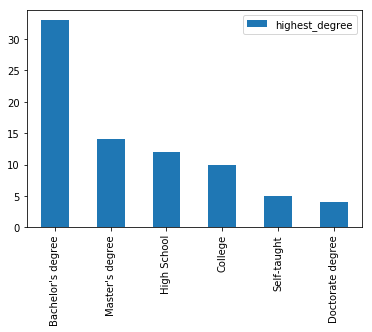

In [7]:
degrees = pd.DataFrame(pd.value_counts(df["highest_degree"]))
degrees

degrees[degrees.highest_degree > 1].plot.bar()


<h4>Different job Titles</h4>


In [8]:
job_titles = df["job_title"]
job_titles
job_titles = [i.lower() for i in job_titles]
job_titles = set(job_titles)
len(job_titles)



0                                        PhD candidate 
1                                     Software Engineer
2                                             Consultor
3                                               Student
4                                               student
5                                                Intern
6                                  Unemployed/In School
7                                   EDI Systems Analyst
8                                            SWE Intern
9                            Senior Research Programmer
10                                    software engineer
11                                  Research Assistant 
12                             Software Engineer Intern
13                                          PhD student
14                                  Senior data analyst
15                                      DevOps Engineer
16                                 Full stack engineer 
17    Wireless Systems API Developer, Server Sec

56